## 1. Data Wrangling - West Nile Virus<a id='1_Data Wrangling'></a>

### 1.1 Table of Contents <a id='1.1_Table_of_Contents'></a>
* [1 Data wrangling - West Nile Virus](#1_Data_wrangling)
     * [1.1 Table of Contents](#1.1_Table_of_Contents)
     * [1.2 Recap Of Data Science Problem](#1.2_Recap_Of_Data_Science_Problem)
     * [1.3 Imports](#1.3_Imports)
     * [1.4 Objects](#1.4_Objects)
* [2. Spray Data](#2_Spray_Data)
     * [2.1 Loading](#2.1_Loading)
     * [2.2 Exploring ](#2.2_Exploring)
     * [2.3 Missing Data](#2.3_Missing_Data)
     * [2.4 Datetime Modification](#2.4_Datetime_Modification)
     * [2.5 Check for Zero](#2.5_Check_for_Zero)
     * [2.6 Check for Duplicates](#2.6_Check_for_Duplicates)
* [3. Weather Data](#3_Weather_Data)
     * [3.1 Loading](#3.1_Loading)
     * [3.2 Exploring](#3.2_Exploring)
     * [3.3 Missing Data](#3.3_Missing_Data)
          * [3.3.1 Tempature](#3.3.1_Tempature)
          * [3.3.2 Precipitation](#3.3.2_Precipitation)
          * [3.3.3 Dew Point](#3.3.3_Dew_Point)
          * [3.3.4 Wet Bulb](#3.3.4_Wet_Bulb)
          * [3.3.5 Heat](#3.3.5_Heat)
          * [3.3.6 Cool](#3.3.6_Cool)
          * [3.3.7 StnPressure](#3.3.7_StnPressure)
          * [3.3.8 Dew Point](#3.3.8_Dew_Point)
          * [3.3.9 SeaLevel](#3.3.9_SeaLevel)
          * [3.3.10 ResultSpeed](#3.3.10_ResultSpeed)
          * [3.3.11 ResultDir](#3.3.11_ResultDir)
          * [3.3.12 AvgSpeed](#3.3.12_AvgSpeed)
          * [3.3.13 SnowFall](#3.3.13_SnowFall)
          * [3.3.14 Sunrise](#3.3.9_Sunrise)
          * [3.3.15 Sunset](#3.3.10_Sunset)
          * [3.3.16 Depth](#3.3.11_Depth)
          * [3.3.17 CodeSum](#3.3.12_CodeSum)
          * [3.3.18 Final Check](#3.3.18_Final_Check)
     * [3.4 Relitive Humidity](#3.4_Relitive_Humidity)
          * [3.4.1 Convert to Celsius](#3.4.1_Convert_to_Celsius)
          * [3.4.2 Calculate Relative Humidity](#3.4.2_Calculate_Relative_Humidity)
     * [3.5 Stations Dates and Format](#3.5_Stations)            
     * [3.6 Shift Values](#3.6_Shift_Values) 
          * [3.6.1 Convert to Celsius](#3.4.1_Convert_to_Celsius)
          * [3.6.2 Calculate Relative Humidity](#3.6.2_Calculate_Relative_Humidity)
          * [3.6.3 Convert to Celsius](#3.6.3_Convert_to_Celsius)
          * [3.6.4 Joining](#3.6.4_Joining)

### 1.2 Recap Of Data Science Problem <a id='1.2_Recap_Of_Data_Science_Problem'></a>

### 1.3 Imports <a id='1.3_Imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
import datetime
from geopy import distance

### 1.4 Objects <a id='1.4_Objects'></a>

## 2. Spray Data <a id='2_Spray_Data'></a>

### 2.1 Loading <a id='2.1_Loading'></a>

In [2]:
spray_data = pd.read_csv('data/spray.csv')

### 2.2 Exploring <a id='2.2_Exploring'></a>

In [3]:
spray_data.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
spray_data.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

In [5]:
spray_data.shape

(14835, 4)

### 2.3 Missing Data <a id='2.3_Missing_Data'></a>

In [6]:
missing = pd.concat([spray_data.isnull().sum(), 100 * spray_data.isnull().mean()], axis=1)
missing.columns=['count', '%']

missing.sort_values(by='count',  ascending=False)

,count,%
Time,584,3.936636
Date,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000


In [7]:
null_data = spray_data[spray_data.isnull().any(axis=1)]
null_data.head()

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014


In [8]:
null_data.Date.unique()

array(['2011-09-07'], dtype=object)

Just to double check:

In [9]:
datetimecheck = null_data[null_data['Date'] == '2011-09-07']
datetimecheck.shape

(584, 4)

All missing values are on the data 2011-09-07, it is unlikely we would be able to recover or solve this issue.

In [10]:
spray_data = spray_data[spray_data['Time'].notna()]
spray_data.shape

(14251, 4)

14835 - 14251 = 584

In [11]:
null_data = spray_data[spray_data.isnull().any(axis=1)]
null_data.head()

,Date,Time,Latitude,Longitude


### 2.4 Datetime Modification <a id='2.4_Datetime Modification'></a>

In [12]:
spray_data['Datetime'] = pd.to_datetime(spray_data[['Date', 'Time']].astype(str).apply(' '.join, 1), infer_datetime_format=True)

In [13]:
spray_data['Datetime'].head()

0   2011-08-29 18:56:58
1   2011-08-29 18:57:08
2   2011-08-29 18:57:18
3   2011-08-29 18:57:28
4   2011-08-29 18:57:38
Name: Datetime, dtype: datetime64[ns]

In [14]:
spray_data = spray_data.drop(['Date', 'Time'], axis = 1)

In [15]:
spray_data.dtypes

Latitude            float64
Longitude           float64
Datetime     datetime64[ns]
dtype: object

### 2.5 Check for Zero <a id='2.5_Check_for_Zero'></a>

In [16]:
spray_data.Datetime[spray_data['Datetime'] == 0]

Series([], Name: Datetime, dtype: datetime64[ns])

In [17]:
spray_data.Latitude[spray_data['Latitude'] == 0]

Series([], Name: Latitude, dtype: float64)

In [18]:
spray_data.Longitude[spray_data['Longitude'] == 0]

Series([], Name: Longitude, dtype: float64)

### 2.6 Check for Duplicates<a id='2.6_Check_for_Duplicates'></a>

In [19]:
duplicates = spray_data.duplicated()
spray_data[duplicates]

,Latitude,Longitude,Datetime
485,41.983917,-87.793088,2011-09-07 19:43:40
490,41.986460,-87.794225,2011-09-07 19:44:32
491,41.986460,-87.794225,2011-09-07 19:44:32
492,41.986460,-87.794225,2011-09-07 19:44:32
493,41.986460,-87.794225,2011-09-07 19:44:32
...,...,...,...
1025,41.986460,-87.794225,2011-09-07 19:44:32
1026,41.986460,-87.794225,2011-09-07 19:44:32
1027,41.986460,-87.794225,2011-09-07 19:44:32
1028,41.986460,-87.794225,2011-09-07 19:44:32


In [20]:
spray_data.drop_duplicates(inplace = True, keep = 'first')
spray_data.info

<bound method DataFrame.info of         Latitude  Longitude            Datetime
0      42.391623 -88.089163 2011-08-29 18:56:58
1      42.391348 -88.089163 2011-08-29 18:57:08
2      42.391022 -88.089157 2011-08-29 18:57:18
3      42.390637 -88.089158 2011-08-29 18:57:28
4      42.390410 -88.088858 2011-08-29 18:57:38
...          ...        ...                 ...
14830  42.006587 -87.812355 2013-09-05 20:34:11
14831  42.006192 -87.816015 2013-09-05 20:35:01
14832  42.006022 -87.817392 2013-09-05 20:35:21
14833  42.005453 -87.817423 2013-09-05 20:35:31
14834  42.004805 -87.817460 2013-09-05 20:35:41

[13710 rows x 3 columns]>

In [21]:
spray = spray_data.set_index(pd.to_datetime(spray_data['Datetime']))

# Add Week and Year cols
spray['Week'] = (spray['Datetime'].dt.strftime('%W')).astype(int)
spray['Year'] = (spray['Datetime'].dt.strftime('%Y')).astype(int)

# remove Datetime col
spray = spray.drop(['Datetime'], axis = 1)

In [22]:
%store spray

Stored 'spray' (DataFrame)


## 3. Weather Data <a id='3_Weather_Data'></a>

### 3.1 Loading <a id='3.1_Loading'></a>

In [23]:
weather_data = pd.read_csv('data/weather.csv', na_values=['M', '-'])

Thats not weird having two spaces before the T? But lets not remove Trace amounts out yet, We may want to infer values or make them a legit 0.

### 3.2 Exploring <a id='3.2_Exploring'></a>

In [24]:
weather_data.head(8)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,,0.0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,NaN,51,57.0,0.0,3.0,...,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,BR,0.0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,NaN,42,47.0,13.0,0.0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,,0.0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58.0,NaN,40,50.0,7.0,0.0,...,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58.0,4.0,41,50.0,7.0,0.0,...,RA,0.0,NaN,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,NaN,NaN,42,50.0,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4


In [25]:
weather_data.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg           float64
Depart         float64
DewPoint         int64
WetBulb        float64
Heat           float64
Cool           float64
Sunrise        float64
Sunset         float64
CodeSum         object
Depth          float64
Water1         float64
SnowFall        object
PrecipTotal     object
StnPressure    float64
SeaLevel       float64
ResultSpeed    float64
ResultDir        int64
AvgSpeed       float64
dtype: object

In [26]:
weather_data.shape

(2944, 22)

### 3.3 Missing Data <a id='3.3_Missing Data'></a>

In [27]:
missing = pd.concat([weather_data.isnull().sum(), 100 * weather_data.isnull().mean()], axis=1)
missing.columns=['count', '%']

missing.sort_values(by='count',  ascending=False)

,count,%
Water1,2944,100.000000
Sunset,1472,50.000000
Depth,1472,50.000000
Depart,1472,50.000000
SnowFall,1472,50.000000
Sunrise,1472,50.000000
Tavg,11,0.373641
Heat,11,0.373641
Cool,11,0.373641
SeaLevel,9,0.305707


Too many missing data points from Water1. Off with their Cols! 
Depart, SnowFall, Sunrise, Sunset, and Depth have half their data missing, lets investigate that.
Codesum has a bunch of different values, none numeric, but perhaps we can adjust that

In [28]:
weather_data = weather_data.drop(['Water1'], axis = 1)

In [29]:
missing = pd.concat([weather_data.isnull().sum(), 100 * weather_data.isnull().mean()], axis=1)
missing.columns=['count', '%']

missing.sort_values(by='count',  ascending=False)

,count,%
Sunrise,1472,50.000000
Sunset,1472,50.000000
Depart,1472,50.000000
SnowFall,1472,50.000000
Depth,1472,50.000000
Tavg,11,0.373641
Heat,11,0.373641
Cool,11,0.373641
SeaLevel,9,0.305707
StnPressure,4,0.135870


#### 3.3.1 Tempature <a id='3.3.1_Tempature'></a>

In [30]:
weather_data.Tavg.unique()

array([67., 68., 51., 52., 56., 58., nan, 60., 59., 65., 70., 69., 71.,
       61., 55., 57., 73., 72., 53., 62., 63., 74., 75., 78., 76., 77.,
       66., 80., 64., 81., 82., 79., 85., 84., 83., 50., 49., 46., 48.,
       45., 54., 47., 44., 40., 41., 38., 39., 42., 37., 43., 86., 87.,
       89., 92., 88., 91., 93., 94., 90., 36.])

In [31]:
weather_data['Tavg'] = (weather_data.Tmax + weather_data.Tmin)/2

Apparantly I need to review how .mean() interacts with everything, everytime I use it, it does the mean of the whole col

In [32]:
weather_data.Tavg.head(8)

0    66.5
1    68.0
2    50.5
3    51.5
4    56.0
5    57.5
6    57.5
7    64.5
Name: Tavg, dtype: float64

In [33]:
weather_data.Tavg.unique()

array([66.5, 68. , 50.5, 51.5, 56. , 57.5, 64.5, 59.5, 60. , 58.5, 65. ,
       67. , 70. , 69. , 69.5, 71. , 60.5, 61. , 55. , 56.5, 73. , 72. ,
       68.5, 54.5, 52.5, 62. , 62.5, 73.5, 74.5, 77.5, 75.5, 77. , 63. ,
       61.5, 57. , 66. , 74. , 76.5, 79.5, 71.5, 70.5, 64. , 55.5, 81. ,
       81.5, 65.5, 75. , 72.5, 78.5, 78. , 80. , 80.5, 79. , 82. , 63.5,
       67.5, 76. , 84.5, 84. , 82.5, 50. , 52. , 48.5, 51. , 49.5, 59. ,
       49. , 46. , 48. , 45. , 53.5, 54. , 53. , 47. , 58. , 46.5, 43.5,
       40. , 40.5, 38. , 38.5, 41.5, 42. , 83.5, 83. , 45.5, 39.5, 36.5,
       37. , 44.5, 42.5, 43. , 44. , 47.5, 85.5, 86.5, 86. , 87. , 88.5,
       91.5, 85. , 88. , 89. , 90.5, 91. , 92.5, 93.5, 87.5, 89.5, 41. ,
       35.5, 36. , 39. , 37.5])

<AxesSubplot:>

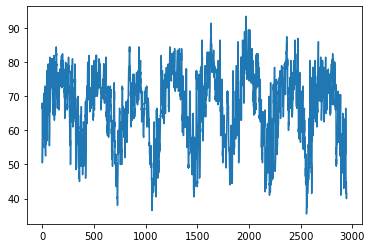

In [34]:
weather_data.Tavg.plot()

#### 3.3.2 Precipitation <a id='3.3.2_Precipitation'></a>

In [35]:
weather_data.PrecipTotal.unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', nan, '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

According to the NOA records, T stands for Trace, which likely means less than 0.01. As for dealing with M, if we have the relavent data from other locations on the same datetime, take the mean for that datetime. Otherwise remove?

In [36]:
# Count the number of M's and T's

weather_data.PrecipTotal.str.count("T").sum()

318.0

In [37]:
# Arbitrarily choosing T to be 0.001
weather_data['PrecipTotal'] = weather_data['PrecipTotal'].replace('  T', '0.001')
weather_data.PrecipTotal.str.count("T").sum()

0.0

In [38]:
weather_data.PrecipTotal.isnull().sum()

2

In [39]:
# Simple Mean fill

weather_data.PrecipTotal.fillna(value=pd.to_numeric(weather_data.PrecipTotal,errors='coerce').mean(), inplace=True)
weather_data.PrecipTotal.isnull().sum()

0

In [40]:
weather_data.PrecipTotal.unique()

array(['0.00', '0.001', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', 0.1314371176070689,
       '0.40', '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89',
       '0.17', '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46',
       '0.29', '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48',
       '0.37', '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67',
       '0.36', '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46',
       '0.12', '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65',
       '1.61', '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68',
       '1.23', '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80',
       '0.86', '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44',
       '1.14', '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10',
 

In [41]:
weather_data['PrecipTotal'] = pd.to_numeric(weather_data['PrecipTotal'], downcast="float")

In [42]:
weather_data['PrecipTotal'].dtypes

dtype('float32')

#### 3.3.3 Dew Point <a id='3.3.3_Dew_Point'></a>

In [43]:
weather_data.DewPoint.unique()

array([51, 42, 40, 41, 38, 39, 30, 58, 57, 59, 60, 52, 44, 36, 37, 33, 32,
       47, 45, 56, 43, 31, 50, 46, 49, 48, 54, 53, 55, 61, 63, 62, 64, 65,
       66, 67, 69, 70, 68, 71, 72, 73, 35, 34, 29, 27, 28, 23, 24, 25, 22,
       26, 75, 74], dtype=int64)

<AxesSubplot:>

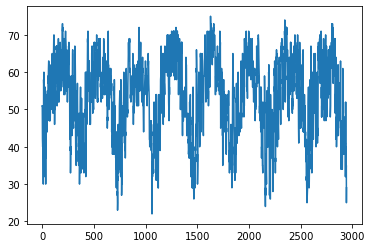

In [44]:
weather_data.DewPoint.plot()

Nothing obviously weird here

#### 3.3.4 WetBulb <a id='3.3.4_WetBulb'></a>

In [45]:
weather_data.WetBulb.unique()

array([56., 57., 47., 48., 50., 49., 46., 54., 53., 62., 63., 60., 61.,
       51., 59., 58., 43., 44., 45., 65., 66., 67., 64., 52., 55., 69.,
       68., 70., 72., 71., 73., 74., 76., 42., 39., 40., 41., 35., 33.,
       34., nan, 75., 36., 32., 38., 78., 77., 37.])

In [46]:
# Simple Mean fill

weather_data.WetBulb.fillna(value=weather_data.WetBulb.mean(), inplace=True)
weather_data.WetBulb.isnull().sum()

0

<AxesSubplot:>

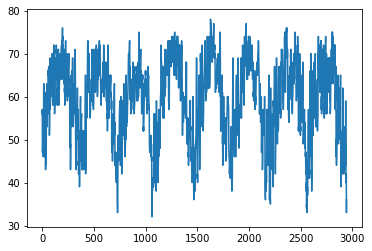

In [47]:
weather_data.WetBulb.plot()

#### 3.3.5 Heat

In [48]:
weather_data.Heat.unique()

array([ 0., 14., 13.,  9.,  7., nan,  5.,  6.,  4., 10.,  8., 12.,  3.,
        2.,  1., 15., 16., 19., 17., 20., 11., 18., 21., 25., 24., 27.,
       26., 23., 28., 22., 29.])

In [49]:
# Simple Mean fill

weather_data.Heat.fillna(value=weather_data.Heat.mean(), inplace=True)
weather_data.Heat.isnull().sum()

0

<AxesSubplot:>

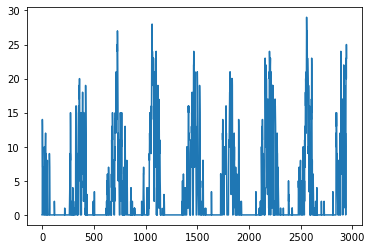

In [50]:
weather_data.Heat.plot()

#### 3.3.6 Cool

In [51]:
weather_data.Cool.unique()

array([ 2.,  3.,  0., nan,  5.,  4.,  6.,  8.,  7.,  9., 10., 13., 11.,
       12.,  1., 15., 16., 17., 14., 20., 19., 18., 21., 22., 24., 27.,
       23., 26., 28., 29., 25.])

In [52]:
# Simple Mean fill

weather_data.Cool.fillna(value=weather_data.Cool.mean(), inplace=True)
weather_data.Cool.isnull().sum()

0

<AxesSubplot:>

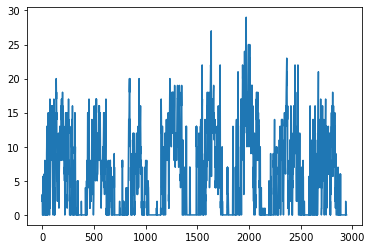

In [53]:
weather_data.Cool.plot()

#### 3.3.7 StnPressure <a id='3.3.7_StnPressure'></a>

In [54]:
weather_data.StnPressure.unique()

array([29.1 , 29.18, 29.38, 29.44, 29.39, 29.46, 29.31, 29.36, 29.4 ,
       29.57, 29.62, 29.29, 29.21, 29.28, 29.2 , 29.26, 29.33, 29.49,
       29.54, 29.55, 29.23, 29.13, 29.19, 29.53, 29.6 , 29.34, 29.41,
       29.47, 29.51, 29.42, 29.43, 29.25, 29.03, 28.82, 28.87, 28.88,
       29.16, 29.07, 28.84, 28.91, 29.24,   nan, 29.3 , 29.12, 29.45,
       29.56, 29.32, 29.05, 29.11, 29.06, 29.22, 29.08, 29.14, 29.37,
       29.35, 29.15, 29.17, 29.48, 29.52, 29.27, 29.5 , 28.59, 28.67,
       28.75, 29.02, 29.79, 29.86, 29.63, 29.7 , 28.95, 29.01, 28.79,
       28.85, 28.97, 28.89, 28.94, 28.93, 28.98, 28.96, 29.  , 29.66,
       29.09, 28.9 , 29.04, 29.59, 29.65, 29.58, 29.61, 29.64, 29.71,
       29.67, 28.8 , 28.73, 29.68, 28.74, 28.55, 28.63, 28.92, 28.99,
       28.81, 28.71, 28.69, 28.77, 28.83])

In [55]:
# Simple Mean fill

weather_data.StnPressure.fillna(value=weather_data.StnPressure.mean(), inplace=True)
weather_data.StnPressure.isnull().sum()

0

<AxesSubplot:>

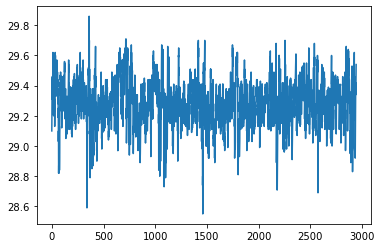

In [56]:
weather_data.StnPressure.plot()

#### 3.3.8 SeaLevel <a id='3.3.8_SeaLevel'></a>

In [57]:
weather_data.SeaLevel.unique()

array([29.82, 30.09, 30.08, 30.12, 30.05, 30.04, 30.1 , 30.29, 30.28,
       30.03, 30.02, 29.94, 29.93, 29.92, 29.91, 30.2 , 30.19, 30.24,
       29.97, 29.98, 29.84, 29.83, 30.27, 30.25, 30.26, 30.11, 30.06,
       30.23, 30.15, 30.14, 30.  , 29.99, 29.9 , 29.77, 29.76, 29.56,
       29.54, 29.52, 29.51, 29.79, 29.78, 29.81, 29.55, 29.85, 30.07,
       30.16,   nan, 29.96, 29.95, 30.13, 30.21, 30.22, 29.88, 30.01,
       29.8 , 29.89, 29.74, 29.87, 29.86, 30.18, 30.17, 29.34, 29.44,
       29.45, 29.71, 29.72, 30.52, 30.53, 30.4 , 30.41, 29.67, 29.53,
       29.69, 29.61, 29.64, 29.63, 29.66, 29.7 , 30.34, 30.33, 29.62,
       29.6 , 29.75, 29.68, 29.73, 30.31, 30.3 , 30.32, 30.37, 30.39,
       29.59, 29.65, 30.35, 30.36, 29.48, 30.38, 29.5 , 29.25, 29.23,
       29.46, 29.43, 29.47])

In [58]:
# Simple Mean fill

weather_data.SeaLevel.fillna(value=weather_data.SeaLevel.mean(), inplace=True)
weather_data.SeaLevel.isnull().sum()

0

<AxesSubplot:>

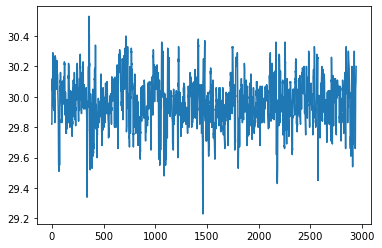

In [59]:
weather_data.SeaLevel.plot()

#### 3.3.9 ResultSpeed <a id='3.3.9_ResultSpeed'></a>

In [60]:
weather_data.ResultSpeed.unique()

array([ 1.7,  2.7, 13. , 13.3, 11.7, 12.9, 10.4, 10.1, 11.2, 14.4, 13.8,
        8.6,  8.5,  2.5,  3.9,  0.7,  2. , 11.3, 12.4, 12.7,  6.6,  6.4,
       16.9, 14.1,  8.1,  7.8,  8. , 10.5,  5.4,  3.4, 11.1,  6.3, 10. ,
       11.4, 10.9, 14.9,  4.9,  4.5,  2.8,  8.9,  8.2,  4.8,  4.7,  5.8,
       10.3,  9.7,  9.3,  4.2,  6.5,  7.5,  5.2,  7.9,  6.2, 10.8,  9.6,
       22.7, 20.3,  0.3,  2.4,  4.6,  8.3,  9.4,  7.2,  7. ,  5.6,  5.9,
        4.1,  3.8,  2.1,  4. , 14. , 12.2, 10.7,  3.5,  3.7,  7.6,  7.3,
        6.1, 11.9,  7.4,  5.1,  9.5,  6.7,  3.1,  4.3,  3.2,  3.3,  8.4,
       12.6,  8.8,  9.1,  1.4,  1.2,  4.4,  7.7,  1.9,  2.9,  1.1,  3. ,
       10.6,  5.5,  5.7,  1.6,  2.6,  1.5,  6.9,  3.6,  6. ,  0.5,  5.3,
        9. ,  2.2, 12.8,  9.2, 12.1,  1.8,  7.1,  6.8, 12.5,  5. ,  9.8,
        2.3, 11.5, 15.1, 14.6, 17.2, 15.5, 16.2, 17.7, 18. , 16.7, 16. ,
       13.9, 14.5, 10.2, 14.3, 13.7, 19.2, 13.2, 21.1, 11.8, 16.1, 14.8,
        8.7, 11.6, 13.6,  1. , 12. , 17.5, 13.4,  9

<AxesSubplot:>

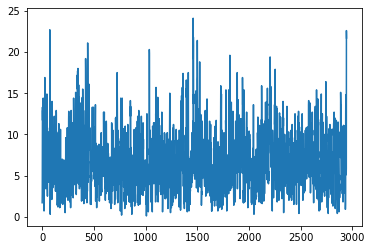

In [61]:
weather_data.ResultSpeed.plot()

#### 3.3.10 ResultDir <a id='3.3.10_ResultDir'></a>

In [62]:
weather_data.ResultDir.unique()

array([27, 25,  4,  2,  7,  6,  8, 11, 10, 18, 17,  9,  3, 36,  1, 14, 21,
       22, 24, 23, 16, 19, 20,  5, 15, 26, 31, 30, 28, 33, 29, 12, 13, 32,
       35, 34], dtype=int64)

<AxesSubplot:>

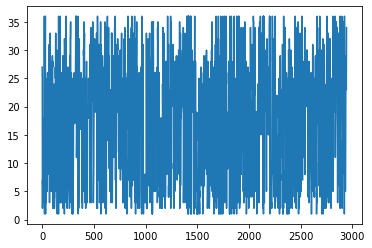

In [63]:
weather_data.ResultDir.plot()

#### 3.3.11 AvgSpeed <a id='3.3.11_AvgSpeed'></a>

In [64]:
weather_data.AvgSpeed.unique()

array([ 9.2,  9.6, 13.4, 11.9, 13.2, 10.8, 10.4, 12. , 11.5, 15. , 14.5,
       10.5,  9.9,  5.8,  5.4,  6.2,  5.9,  4.1,  3.9, 12.9, 12.8, 13. ,
        8.1,  7.6, 17.3, 14.6, 12.3, 12.2, 11.8, 11.3,  7.5,  5.5, 11.4,
       10.7,  9.7,  8.2,  7.8, 10.2, 10.6, 11.2, 15.2,  8.8,  7.2,  9.5,
        5.3,  5.2,  6.5,  7.4, 10.1,  6.4,  6.7, 23.1, 20.7, 13.8, 12.4,
        5. ,  4.7,  5.6,  6.9,  8.4, 10. ,  8.6,  nan,  6.8,  4.9,  6.1,
        6.3, 15.1, 12.6,  7.7,  8.7,  9. ,  8. ,  6. ,  7.1,  8.5, 12.5,
       13.3,  8.3,  7.3, 13.1, 12.7, 10.9, 11.1, 13.9,  6.6, 14.4,  9.1,
        3.3,  3.5,  4. ,  7. ,  9.4,  7.9,  5.7,  4.3,  4.6,  3.7, 11.7,
        4.4, 12.1, 13.5, 13.7, 11. ,  9.8,  8.9, 10.3, 15.5, 18.9, 17.2,
       16.7, 18. , 18.2, 16.8, 14.1, 14.7,  4.2,  9.3, 14.3, 17.7, 17.8,
       15.9, 19.3, 17.4,  3.8,  4.8, 14. , 21.5, 19.5, 16.3,  5.1,  3.6,
        3.2,  4.5,  2.9,  3.1,  2.7, 18.4, 16.4, 14.8, 11.6, 13.6,  2.4,
        2.6,  3.4,  3. ,  2.1, 20.2, 14.9, 16.2, 15

In [65]:
# Simple Mean fill

weather_data.AvgSpeed.fillna(value=weather_data.AvgSpeed.mean(), inplace=True)
weather_data.AvgSpeed.isnull().sum()

0

<AxesSubplot:>

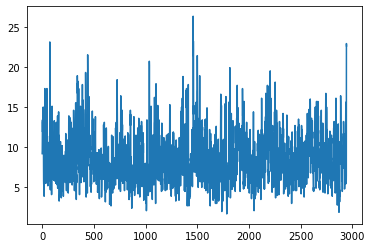

In [66]:
weather_data.AvgSpeed.plot()

#### 3.3.12 Depart <a id='3.3.12_SnowFall'></a>

In [67]:
Temp = weather_data[['Station', 'Depart']]
val1 = Temp.Depart[Temp.Station == 2].isnull().sum()
val2 = Temp.Depart[Temp.Station == 1].isnull().sum()
print(val1, val2)

1472 0


In [68]:
# As of yet we do not know how to adequately solve all missing values for station2's Depart so, remove col

weather_data = weather_data.drop(['Depart'], axis = 1)

#### 3.3.13 SnowFall <a id='3.3.13_SnowFall'></a>

In [69]:
Temp2 = weather_data[['Station', 'SnowFall']]
val1 = Temp2.SnowFall[Temp2.Station == 2].isnull().sum()
val2 = Temp2.SnowFall[Temp2.Station == 1].isnull().sum()
print(val1, val2)

1472 0


In [70]:
# As of yet we do not know how to adequately solve all missing values for station2's Snowfall so, remove col

weather_data = weather_data.drop(['SnowFall'], axis = 1)

#### 3.3.14 Sunrise <a id='3.3.14_Sunrise'></a>

In [71]:
Temp3 = weather_data[['Station', 'Sunrise']]
val1 = Temp3.Sunrise[Temp3.Station == 2].isnull().sum()
val2 = Temp3.Sunrise[Temp3.Station == 1].isnull().sum()
print(val1, val2)

1472 0


Sunrise is going to be virtually identical due to how close they are so...but lets check Sunset as well


#### 3.3.15 Sunset <a id='3.3.15_Sunset'></a>

In [72]:
Temp4 = weather_data[['Station', 'Sunset']]
val1 = Temp4.Sunset[Temp4.Station == 2].isnull().sum()
val2 = Temp4.Sunset[Temp4.Station == 1].isnull().sum()
print(val1, val2)

1472 0


Lets impute sunrise and sunset

In [73]:
def impute_sun(row):
    if row['Station'] == 2:
        row['Sunrise'] = weather_data[(weather_data['Date'] == row['Date']) & (weather_data['Station'] == 1)]['Sunrise'].values[0]
        row['Sunset'] = weather_data[(weather_data['Date'] == row['Date']) & (weather_data['Station'] == 1)]['Sunset'].values[0]
    return row

In [74]:
weather_data = weather_data.apply(impute_sun, axis=1)

#### 3.3.16 Depth <a id='3.3.16_Depth'></a>

In [75]:
Temp5 = weather_data[['Station', 'Depth']]
val1 = Temp5.Depth[Temp5.Station == 2].isnull().sum()
val2 = Temp5.Depth[Temp5.Station == 1].isnull().sum()
print(val1, val2)

1472 0


In [76]:
# As of yet we do not know how to adequately solve all missing values for station2's Depth so, remove col

weather_data = weather_data.drop(['Depth'], axis = 1)

#### 3.3.17 Codesum <a id='3.3.17_CodeSum'></a>

In [77]:
weather_data.CodeSum.unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

This isn't going to be a nightmare to deal, with. Fortunatelty we can do this step by step. First we need to split the information by adding spaces where it is needed. As seen above, some codes are in 4 letter strings, which when reviewing documentation from NOAA, does not exist. Then we will turn it categorical. However, many of these codes imply similiar weather types so we will also be converging some of these into the same categories.

In [78]:
# Splitting

codes = ['+FC','FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL',
         'IC', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'VA', 'DU', 'DS',
         'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR',
         'BC', 'BL', 'VC']

weather_data.CodeSum = weather_data.CodeSum.apply(lambda x: ' '.join([t for t in x.split(' ') if t in codes]))

NOAA codes:

* +FC TORNADO/WATERSPOUT
* FC FUNNEL CLOUD
* TS THUNDERSTORM
* GR HAIL
* RA RAIN 
* DZ DRIZZLE
* SN SNOW
* SG SNOW GRAINS
* GS SMALL HAIL &/OR SNOW PELLETS
* PL ICE PELLETS
* IC ICE CRYSTALS
* FG+ HEAVY FOG (FG & LE.25 MILES VISIBILITY)
* FG FOG
* BR MIST
* UP UNKNOWN PRECIPITATION
* HZ HAZE
* FU SMOKE
* VA VOLCANIC ASH
* DU WIDESPREAD DUST
* DS DUSTSTORM
* PO SAND/DUST WHIRLS
* SA SAND
* SS SANDSTORM
* PY SPRAY
* SQ SQUALL
* DR LOW DRIFTING
* SH SHOWER
* FZ FREEZING
* MI SHALLOW
* PR PARTIAL
* BC PATCHES
* BL BLOWING
* VC VICINITY
* - LIGHT
* + HEAVY
* "NO SIGN" MODERATE 

Water is water and Ice is ice. Following some tips found elsewhere and wholely based on opinion for the moment, we will make larger buckets for these to fit into

In [79]:
# The split
weather_data['split_codesum'] = weather_data['CodeSum'].apply(lambda x: len(x.split()))

# The Buckets
snow = ['SN', 'SG', 'GS', 'PL', 'IC', 'DR', 'BC']
wind = ['SQ', 'DS', 'SS', 'PO', 'BL']
rain = ['TS', 'GR', 'RA', 'DZ', 'SH']
low_vis = ['FG+', 'FG', 'BR', 'HZ']
other = ['UP', 'VA', 'DU', 'SA', 'FZ']

# Bucketification
def codesum_buckets(row):
    codes = row['CodeSum'].split()
    
    # Check for weather conditions
    if any(code in codes for code in snow):
        row['snow'] = 1
    if any(code in codes for code in wind):
        row['wind'] = 1 
    if any(code in codes for code in rain):
        row['rain'] = 1 
    if any(code in codes for code in low_vis):
        row['low_vis'] = 1
    if any(code in codes for code in other):
        row['other'] = 1
        
    return row

weather_data = weather_data.apply(codesum_buckets, axis=1)

In [80]:
weather_data[['snow', 'wind', 'rain', 'low_vis']].sum()

snow          6.0
wind          3.0
rain       1007.0
low_vis     882.0
dtype: float64

In [81]:
weather_data['snow'].unique()

array([nan,  1.])

Normally I would assume everyone would already know the nan would be there, but in any case lets replace nan with 0

In [82]:
weather_data[['snow', 'wind', 'rain', 'low_vis']] = weather_data[['snow', 'wind', 'rain', 'low_vis']].fillna(0)
weather_data['snow'].unique()

array([0., 1.])

In [83]:
weather_data.dtypes

AvgSpeed         float64
CodeSum           object
Cool             float64
Date              object
DewPoint           int64
Heat             float64
PrecipTotal      float64
ResultDir          int64
ResultSpeed      float64
SeaLevel         float64
Station            int64
StnPressure      float64
Sunrise          float64
Sunset           float64
Tavg             float64
Tmax               int64
Tmin               int64
WetBulb          float64
low_vis          float64
rain             float64
snow             float64
split_codesum      int64
wind             float64
dtype: object

In [84]:
# Drop original CodeSum and according to convention, Snow and Wind have such a small count, it is better to remove those 
# apparantly. Also for whatever reason we have another extra col?

weather_data = weather_data.drop('CodeSum', axis = 1)
weather_data = weather_data.drop('snow', axis = 1)
weather_data = weather_data.drop('wind', axis = 1)
weather_data = weather_data.drop('split_codesum', axis = 1)

#### 3.3.18 Final Check <a id='3.3.18_Final_Check'></a>

In [85]:
missing = pd.concat([weather_data.isnull().sum(), 100 * weather_data.isnull().mean()], axis=1)
missing.columns=['count', '%']

missing.sort_values(by='count',  ascending=False)

,count,%
AvgSpeed,0,0.0
StnPressure,0,0.0
low_vis,0,0.0
WetBulb,0,0.0
Tmin,0,0.0
Tmax,0,0.0
Tavg,0,0.0
Sunset,0,0.0
Sunrise,0,0.0
Station,0,0.0


### 3.4 Relitive Humidity <a id='3.4_Relitive_Humidity'></a>

Calculation Notes for relative humidity:

Saturation Vapor Pressure :

Temputure = T (in celsius) 
Dewpoint Temp = Td (in celsius)

* es = 6.11E( ( 7.5 * T ) / ( 273.3 + T ) )  [eq. 1]

Vapor Pressure :

* e = 6.11E( ( 7.5 * Td ) / ( 273.3 + Td ) ) [eq. 2]

Relative Humidity:

* RH = ( e / es ) * 100 [eq. 3]

F to C conversion:

* C = ( F - 32 ) * ( 5 / 9 ) [eq. 4]

Primary Sources:

* https://www.weather.gov/media/epz/wxcalc/vaporPressure.pdf <-- primary for equations

* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7068582/ <-- Journal concerning primary weather conditions

* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3750695/ <-- specific study attempting to determine mathmatical formula based on weather

Secondary Sources:

* https://www.theweatherprediction.com/habyhints/186/

* https://snowball.millersville.edu/~adecaria/ESCI241/esci241_lesson06_humidity.pdf

* https://www.omnicalculator.com/chemistry/vapour-pressure-of-water

#### 3.4.1 Convert to Celsius <a id='3.4.1_Convert_to_Celsius'></a>

In [86]:
# Double check format, NOAA is in F not C, need to convert. Using equation #4

weather_data['TmaxC'] = (weather_data['Tmax'] - 32) * (5/9)
weather_data['TminC'] = (weather_data['Tmin'] - 32) * (5/9)
weather_data['TavgC'] = (weather_data['Tavg'] - 32) * (5/9)
weather_data['DewPointC'] = (weather_data['DewPoint'] - 32) * (5/9)

In [87]:
weather_data.TmaxC.head()

0    28.333333
1    28.888889
2    15.000000
3    15.555556
4    18.888889
Name: TmaxC, dtype: float64

In [88]:
weather_data.TminC.head()

0    10.000000
1    11.111111
2     5.555556
3     6.111111
4     7.777778
Name: TminC, dtype: float64

In [89]:
weather_data.TavgC.head()

0    19.166667
1    20.000000
2    10.277778
3    10.833333
4    13.333333
Name: TavgC, dtype: float64

In [90]:
weather_data.DewPointC.head()

0    10.555556
1    10.555556
2     5.555556
3     5.555556
4     4.444444
Name: DewPointC, dtype: float64

#### 3.4.2 Calculate Relative Humidity <a id='3.4.2_Calculate_Relative_Humidity'></a>

In [91]:
# See Equations #1, 2, and 3

weather_data['RHmax'] =(( 6.11 ** ((7.5 * weather_data['DewPointC']) / (273.3 + weather_data['DewPointC']))) / 6.11 ** ((7.5 * weather_data['TmaxC'])/(273.3 + weather_data['TmaxC']))) * 100
weather_data['RHmin'] =(( 6.11 ** ((7.5 * weather_data['DewPointC']) / (273.3 + weather_data['DewPointC']))) / 6.11 ** ((7.5 * weather_data['TminC'])/(273.3 + weather_data['TminC']))) * 100
weather_data['RHavg'] =(( 6.11 ** ((7.5 * weather_data['DewPointC']) / (273.3 + weather_data['DewPointC']))) / 6.11 ** ((7.5 * weather_data['TavgC'])/(273.3 + weather_data['TavgC']))) * 100

In [92]:
weather_data.RHmax.head()

0    46.287193
1    45.252309
2    64.672944
3    63.091975
4    51.668659
Name: RHmax, dtype: float64

In [93]:
weather_data.RHmin.head()

0    102.596108
1     97.479344
2    100.000000
3     97.389432
4     85.350408
Name: RHmin, dtype: float64

In [94]:
weather_data.RHavg.head()

0    68.057935
1    65.648760
2    80.128196
3    78.104535
4    66.085162
Name: RHavg, dtype: float64

In [95]:
# Drop all the pesky faherinheit temps

weather_data = weather_data.drop('Tmax', axis = 1)
weather_data = weather_data.drop('Tmin', axis = 1)
weather_data = weather_data.drop('Tavg', axis = 1)

### 3.5 Stations, Dates & Format<a id='3.5_Stations'></a>

Back tracking a bit. To properly use shift we need to seperate the stations and reformat some cols

In [96]:
weather_data.Station.unique()

array([1, 2], dtype=int64)

In [97]:
weather_data['Date'] = pd.to_datetime(weather_data.Date)
weather_data['Date'].head()

0   2007-05-01
1   2007-05-01
2   2007-05-02
3   2007-05-02
4   2007-05-03
Name: Date, dtype: datetime64[ns]

In [98]:
weather_data.dtypes

AvgSpeed              float64
Cool                  float64
Date           datetime64[ns]
DewPoint                int64
Heat                  float64
PrecipTotal           float64
ResultDir               int64
ResultSpeed           float64
SeaLevel              float64
Station                 int64
StnPressure           float64
Sunrise               float64
Sunset                float64
WetBulb               float64
low_vis               float64
rain                  float64
TmaxC                 float64
TminC                 float64
TavgC                 float64
DewPointC             float64
RHmax                 float64
RHmin                 float64
RHavg                 float64
dtype: object

In [99]:
weather_data.PrecipTotal.dtypes

dtype('float64')

In [100]:
station1 = weather_data[weather_data['Station'] == 1]
station1.reset_index(drop=True, inplace=True)
station2 = weather_data[weather_data['Station'] == 2]
station2.reset_index(drop=True, inplace=True)
station1.head()

,AvgSpeed,Cool,Date,DewPoint,Heat,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,Station,...,WetBulb,low_vis,rain,TmaxC,TminC,TavgC,DewPointC,RHmax,RHmin,RHavg
0,9.2,2.0,2007-05-01,51,0.0,0.000,27,1.7,29.82,1,...,56.0,0.0,0.0,28.333333,10.000000,19.166667,10.555556,46.287193,102.596108,68.057935
1,13.4,0.0,2007-05-02,42,14.0,0.000,4,13.0,30.09,1,...,47.0,1.0,0.0,15.000000,5.555556,10.277778,5.555556,64.672944,100.000000,80.128196
2,11.9,0.0,2007-05-03,40,9.0,0.000,7,11.7,30.12,1,...,48.0,0.0,0.0,18.888889,7.777778,13.333333,4.444444,51.668659,85.350408,66.085162
3,10.8,0.0,2007-05-04,41,7.0,0.001,8,10.4,30.05,1,...,50.0,0.0,1.0,18.888889,9.444444,14.166667,5.000000,53.064901,81.095518,65.371623
4,12.0,0.0,2007-05-05,38,5.0,0.001,7,11.7,30.10,1,...,49.0,0.0,0.0,18.888889,11.666667,15.277778,3.333333,48.969684,67.558455,57.402276


### 3.6 Shift Values<a id='3.6_Shift_Values'></a>

Use shift function to create lag variables

Incubation Length Sources:
* https://www.cdc.gov/dengue/resources/factsheets/mosquitolifecyclefinal.pdf

Key Takeaways:
* The entire life cycle, from an egg to an adult, takes approximately 8-10 days
* Eggs are ready to hatch from a few days to several months after being laid.

Research to be done:
* Cx. restuans can develop from egg to adult in about 10 days
* Life Cycle of Culex Species Mosquitoes: It takes about 7-10 days for an egg to develop into an adult mosquito.

https://pubmed.ncbi.nlm.nih.gov/25284257/:
The common house mosquito, Culex pipiens (Diptera: Culicidae), which is considered the primary bridge vector of West Nile Virus (WNV) to humans, is a wide spread insect pest with medical importance and consists of two distinct bioforms, Cx. pipiens f. pipiens and Cx. pipiens f. molestus. Here, we consider the adult lifespan of male and female Cx. pipiens f. pipiens under controlled conditions at five constant temperature regimes (15, 20, 25, 27.5, and 30 °C). Our results show that adult longevity was affected by temperature, as it significantly decreased with increase in temperature. At the highest tested temperature, mean adult longevity did not exceed 12 days for both sexes and thus makes impossible the risk of WNV transmission. On the other hand at the lowest temperature, longevity was extremely high with some individuals surviving up to 129 and 132 days, males and females, respectively, and thus enable them to function as potential vectors of WNV for a prolonged period of time.

#### 3.6.1 Station Seperation<a id='3.6.1_Station_Seperation'></a>

In [101]:
# Save the original Date Col for later
date_col = pd.DataFrame(station1['Date'])
date_col['Week'] = (date_col['Date'].dt.strftime('%W')).astype(int)
date_col['Year'] = (date_col['Date'].dt.strftime('%Y')).astype(int)
date_col.set_index(date_col['Date'], inplace=True)
date_col = date_col.drop('Date', axis = 1)
date_col.head()

,Week,Year
Date,,
2007-05-01,18,2007
2007-05-02,18,2007
2007-05-03,18,2007
2007-05-04,18,2007
2007-05-05,18,2007


In [102]:
date_col.shape

(1472, 2)

In [103]:
station2.head()

,AvgSpeed,Cool,Date,DewPoint,Heat,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,Station,...,WetBulb,low_vis,rain,TmaxC,TminC,TavgC,DewPointC,RHmax,RHmin,RHavg
0,9.6,3.000000,2007-05-01,51,0.000000,0.000,25,2.7,29.82,2,...,57.0,0.0,0.0,28.888889,11.111111,20.000000,10.555556,45.252309,97.479344,65.648760
1,13.4,0.000000,2007-05-02,42,13.000000,0.000,2,13.3,30.08,2,...,47.0,1.0,0.0,15.555556,6.111111,10.833333,5.555556,63.091975,97.389432,78.104535
2,13.2,0.000000,2007-05-03,40,7.000000,0.000,6,12.9,30.12,2,...,50.0,1.0,0.0,19.444444,8.888889,14.166667,4.444444,50.438553,81.028035,63.651566
3,10.4,5.647119,2007-05-04,42,3.407092,0.000,7,10.1,30.04,2,...,50.0,0.0,0.0,25.555556,10.555556,18.055556,5.555556,41.052005,79.108905,56.508408
4,11.5,0.000000,2007-05-05,39,5.000000,0.001,7,11.2,30.09,2,...,50.0,0.0,0.0,18.888889,12.222222,15.555556,3.888889,50.303777,67.663087,58.241603


#### 3.6.2 Shifting<a id='3.6.2_Station_Seperation'></a>

In [104]:
#remove date for now
station1 = station1.drop(['Date'], axis = 1)
station2 = station2.drop(['Date'], axis = 1)

In [105]:
# One week later, least time from egg to adult
d7_station1 = station1.shift(7)
d7_station2 = station2.shift(7)

# Two weeks later, a few days after longer time to adult.
d14_station1 = station1.shift(14)
d14_station2 = station2.shift(14)
d7_station1.head(10)

,AvgSpeed,Cool,DewPoint,Heat,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,Station,StnPressure,...,WetBulb,low_vis,rain,TmaxC,TminC,TavgC,DewPointC,RHmax,RHmin,RHavg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9.2,2.0,51.0,0.0,0.0,27.0,1.7,29.82,1.0,29.10,...,56.0,0.0,0.0,28.333333,10.000000,19.166667,10.555556,46.287193,102.596108,68.057935
8,13.4,0.0,42.0,14.0,0.0,4.0,13.0,30.09,1.0,29.38,...,47.0,1.0,0.0,15.000000,5.555556,10.277778,5.555556,64.672944,100.000000,80.128196
9,11.9,0.0,40.0,9.0,0.0,7.0,11.7,30.12,1.0,29.39,...,48.0,0.0,0.0,18.888889,7.777778,13.333333,4.444444,51.668659,85.350408,66.085162


#### 3.6.3 Reorganization<a id='3.6.3_Reorganization'></a>

I'm sure I will find a better way to do this, but I wanted to simply get it done first, then I will come back and make a more automated processs, though for practical reasons, if you don't already know exactly how to make a function to do this, its faster to just type a little bit.

In [106]:
d7_station1.columns = [str(col) + '_d7' for col in d7_station1.columns]
d7_station2.columns = [str(col) + '_d7' for col in d7_station2.columns]

d14_station1.columns = [str(col) + '_d14' for col in d14_station1.columns]
d14_station2.columns = [str(col) + '_d14' for col in d14_station2.columns]

#### 3.6.4 Joining<a id='3.6.4_Joining'></a>

In [107]:
# Reset index again to the original date, also needs to be fixed to be more pythony...
station1.set_index(date_col.index, inplace=True)
station2.set_index(date_col.index, inplace=True)

# The one week shift
d7_station1.set_index(date_col.index, inplace=True)
d7_station2.set_index(date_col.index, inplace=True)

# The two week shift
d14_station1.set_index(date_col.index, inplace=True)
d14_station2.set_index(date_col.index, inplace=True)
station1.index

DatetimeIndex(['2007-05-01', '2007-05-02', '2007-05-03', '2007-05-04',
               '2007-05-05', '2007-05-06', '2007-05-07', '2007-05-08',
               '2007-05-09', '2007-05-10',
               ...
               '2014-10-22', '2014-10-23', '2014-10-24', '2014-10-25',
               '2014-10-26', '2014-10-27', '2014-10-28', '2014-10-29',
               '2014-10-30', '2014-10-31'],
              dtype='datetime64[ns]', name='Date', length=1472, freq=None)

In [108]:
# Concat back into two DF's based on station
station1 = pd.concat([station1, d7_station1, d14_station1], axis=1)
station2 = pd.concat([station2, d7_station2, d14_station2], axis=1)

In [109]:
station1.shape

(1472, 66)

In [110]:
station2.shape

(1472, 66)

In [111]:
temp = station1[['Cool', 'Cool_d7', 'Cool_d14']]
temp.head(22)

,Cool,Cool_d7,Cool_d14
Date,,,
2007-05-01,2.0,NaN,NaN
2007-05-02,0.0,NaN,NaN
2007-05-03,0.0,NaN,NaN
2007-05-04,0.0,NaN,NaN
2007-05-05,0.0,NaN,NaN
2007-05-06,0.0,NaN,NaN
2007-05-07,0.0,NaN,NaN
2007-05-08,3.0,2.0,NaN
2007-05-09,4.0,0.0,NaN


In [112]:
# Recombine as an average for now becuase my python skills in a certain area can't do a certain thing right now.

station = pd.concat([station1, station2, date_col]).groupby(level=0).mean()
station.shape

(1472, 68)

In [113]:
station = station.dropna()
station.shape

(1458, 68)

In [114]:
# Backward fix, remove the temp station col
station = station.drop(['Station', 'Station_d7', 'Station_d14'], axis = 1)
station.shape

(1458, 65)

In [123]:
# Additional patch to remove the farenhite dewpoint
station = station.drop(['DewPoint'], axis = 1)
station.shape

(1458, 64)

In [124]:
%store station

Stored 'station' (DataFrame)


### 4. Training Data

In [116]:
train = pd.read_csv('data/train.csv')

In [117]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [118]:
# Maybe when I return with more skillz I will address using these. For now drop
train.drop(['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy'], axis=1, inplace=True)

In [119]:
# Make Date into datetime
train['Date'] = pd.to_datetime(train['Date'])

# Add week and Year columns
train['Week'] = (train['Date'].dt.strftime('%W')).astype(int)
train['Year'] = (train['Date'].dt.strftime('%Y')).astype(int)

In [120]:
# Merge duplicate rows by summing NumMosquiots and WMvPresent
train = train.groupby(['Date','Week','Year','Species','Trap','Latitude', 'Longitude'], as_index=False).sum().reindex()

# Change WnvPresent to be  0/1
train['WnvPresent'] = (train['WnvPresent'] > 0).astype(int)

In [121]:
duplicates = train.duplicated()
train[duplicates]

,Date,Week,Year,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent


Kaggle info:
* Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
* Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
NOAA info:
* Latitude/Longitude	41.78611°, -87.75222°
* Latitude/Longitude	41.96019°, -87.93162°

In [122]:
%store train

Stored 'train' (DataFrame)


In [ ]:
# Save station coordinates when we come back and make this better when we know certain python mechanics better
coord1 = (41.96019, -87.93162)
coord2 = (41.78611, -87.75222)

In [ ]:
len(train['Latitude']), len(train['Longitude'])

In [ ]:
#train['coord'] = train[train.Latitude,train.Longitude].values.tolist()
#train.head()

In [ ]:
#train['station'] = 1 if distance.distance((train.Latitude, train.Longitude), coord1).km < distance.distance((train.Latitude,train.Longitude), coord2).km else 2

In [ ]:
train.columns